In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from IPython.display import display 
import PIL
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

class GetCars:
    
    def __init__(self, loc="car_ims/car_ims/", labels_matlab_file ="devkit/cars_annos.mat"):
        
        self.car_images_location = loc
        self.labels_mat = scipy.io.loadmat(labels_matlab_file)
        
        self.number_of_classes = len(self.labels_mat['class_names'][0])
        self.class_names = [str(self.labels_mat['class_names'][0][i][0]) for i in range(self.number_of_classes)]
        
        
        self.max_pics = 16185
        
        self.annot_df = self.create_annot_df()
        self.class_names_df = self.create_class_df()
        
        
    def bring_annot(self, fileName):
        if type(fileName) == str:
            numb = int(re.sub(r'[^0-9]', '', fileName))
        else:
            numb = int(fileName)

        return ((self.labels_mat['annotations'][0][numb-1]))  
    
    
    def bringup_ClassLabel(self, fileName):
        if type(fileName) == str:
            numb = int(re.sub(r'[^0-9]', '', fileName))
        else:
            numb = int(fileName)

        return self.class_names[int(self.labels_mat['annotations'][0][numb-1][5])-1]

        
    def bring_AnnotList(self, fileName):
        if type(fileName) == str:
            numb = int(re.sub(r'[^0-9]', '', fileName))
        else:
            numb = int(fileName)
        
        annot_array = self.bring_annot(numb)
        xmin = annot_array[1][0][0]
        ymin = annot_array[2][0][0]
        xmax = annot_array[3][0][0]
        ymax = annot_array[4][0][0]
        class_no = annot_array[5][0][0]
        class_label = self.bringup_ClassLabel(numb)
        train_test = annot_array[6][0][0]
        
        annot = [numb, xmin, ymin, xmax, ymax, class_no, class_label, train_test]

        return annot  
    
    def create_annot_df(self):
        
        list_df = []
        
        for fileName in range(1, self.max_pics + 1):
            list_df.append(self.bring_AnnotList(fileName))
            
        cols = ["fileNumber", "xmin", "ymin", "xmax", "ymax", "class_no", "class_label", "train_test"]
        
        return pd.DataFrame(list_df, columns = cols)
    
    def create_class_df(self):
        pass
    
    def getImages_by_class(self):
        pass
    
    def show_annots(self, fileName):
        if type(fileName) == str:
            numb = int(re.sub(r'[^0-9]', '', fileName))
        else:
            numb = int(fileName)

        print("Annot:     "+str(cars.labels_mat['annotations'][0][numb-1]))
        print("File Name: "+str(cars.labels_mat['annotations'][0][numb-1][0][0]))
        print("x min:     "+str(cars.labels_mat['annotations'][0][numb-1][1][0][0]))
        print("y min:     "+str(cars.labels_mat['annotations'][0][numb-1][2][0][0]))
        print("x max:     "+str(cars.labels_mat['annotations'][0][numb-1][3][0][0]))
        print("y max:     "+str(cars.labels_mat['annotations'][0][numb-1][4][0][0]))
        print("class no:  "+str(cars.labels_mat['annotations'][0][numb-1][5][0][0]))
        print("Train(0)/Test(1): "+str(cars.labels_mat['annotations'][0][numb-1][6][0][0]))

    
    def getPath(self, number):
        fileName  = str('0') * int(6 - len(str(number)))
        fileName += str(number)+".jpg"
        return (self.car_images_location + fileName)

    
    def getImgArray(self, number, target_size=(224, 224) ):
        img_path =  self.getPath(number)
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        return x
    

    def getNextImgArray(self, target_size=(224, 224) ):
        count = 0
        
        while count<self.max_pics:
            count += 1        
        
            yield (count, self.getImgArray(count, target_size))
    

    def showRandomNxN(self, N):
        plt.rcParams['figure.figsize'] = [30, 30]

        listofRand = np.random.randint(1, self.max_pics + 1, size=int(N*N))

        image_size = (128, 128)

        fig = plt.figure()

        for i in range(0, N*N):
            img = image.load_img(self.getPath(listofRand[i]), target_size=image_size)
            ax = fig.add_subplot(N, N, i+1)
            imgplot = ax.imshow(img)
            ax.set_title(self.bringup_ClassLabel(listofRand[i]))
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show();
    
    
    def show_classNxN(self, class_no = 20, N=4):
        plt.rcParams['figure.figsize'] = [30, 30]
        
        list_of_images = list(self.annot_df.loc[self.annot_df["class_no"] == class_no]["fileNumber"])

        listofRand = np.random.choice(list_of_images, size = N*N, replace=False)

        image_size = (128, 128)

        fig = plt.figure()

        for i in range(0, N*N):
            img = image.load_img(self.getPath(listofRand[i]), target_size=image_size)
            ax = fig.add_subplot(N, N, i+1)
            imgplot = ax.imshow(img)
            ax.set_title(self.bringup_ClassLabel(listofRand[i]))
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show();
        
    def show_1EachClass7x7(self, quarter = 1):
        assert quarter <= 4
        
        plt.rcParams['figure.figsize'] = [30, 30]
        
        fig = plt.figure()
        
        for class_no in range((quarter-1)*49, quarter*49):
            
            list_of_images = list(self.annot_df.loc[self.annot_df["class_no"] == class_no + 1]["fileNumber"])
            listofRand = np.random.choice(list_of_images, size = 1, replace=False)
            image_size = (128, 128)

            
            img = image.load_img(self.getPath(listofRand[0]), target_size=image_size)
            ax = fig.add_subplot(7, 7, class_no + 1 - (quarter-1)*49)
            imgplot = ax.imshow(img)
            ax.set_title("Class "+str(class_no+1)+ " " + self.bringup_ClassLabel(listofRand[0]))
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show();

In [9]:
# Ausgabe Tabelle mit allen Images und deren Klassennummern, um diese dann via Join mit der Label-Tabelle zu verbinden
cars = GetCars()
annots = cars.annot_df.copy()

In [10]:
print(annots)

       fileNumber  xmin  ymin  xmax  ymax  class_no  \
0               1   112     7   853   717         1   
1               2    48    24   441   202         1   
2               3     7     4   277   180         1   
3               4    33    50   197   150         1   
4               5     5     8    83    58         1   
...           ...   ...   ...   ...   ...       ...   
16180       16181    38    36   375   234       196   
16181       16182    29    34   235   164       196   
16182       16183    25    32   587   359       196   
16183       16184    56    60   208   186       196   
16184       16185     1     1   200   131       196   

                         class_label  train_test  
0         AM General Hummer SUV 2000           0  
1         AM General Hummer SUV 2000           0  
2         AM General Hummer SUV 2000           0  
3         AM General Hummer SUV 2000           0  
4         AM General Hummer SUV 2000           0  
...                              

In [12]:
# Definition der Labelnamen beruhend auf der Labeltabelle und deren Subklassen
lbl1_names = {
    "c": (1, "Coupe/Convrtbl"),    
    "s": (2, "Sedan"),
    "u": (3, "SUVs/Trucks/Vans"),
    "t": (3, "SUVs/Trucks/Vans"),
    "v": (3, "SUVs/Trucks/Vans")
}

lbl2_names = {
    "c": (1,"Coupe/Convrtbl"),
    "s": (2, "Sedan"),
    "u": (3, "SUV"),
    "t": (4, "Trucks"),
    "v": (5, "Van/Minivan")
}

type_labels = pd.read_csv("devkit/cars_label1.csv")
type_labels['Label1'] = type_labels["subclass"].apply(lambda x: lbl1_names[x][1])
type_labels['Label1_No'] = type_labels["subclass"].apply(lambda x: lbl1_names[x][0])
type_labels['Label2'] = type_labels["subclass"].apply(lambda x: lbl2_names[x][1])
type_labels['Label2_No'] = type_labels["subclass"].apply(lambda x: lbl2_names[x][0])
type_labels

,Unnamed: 0,class,subclass,Label1,Label1_No,Label2,Label2_No
0,0,1,u,SUVs/Trucks/Vans,3,SUV,3
1,1,2,s,Sedan,2,Sedan,2
2,2,3,s,Sedan,2,Sedan,2
3,3,4,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
4,4,5,s,Sedan,2,Sedan,2
...,...,...,...,...,...,...,...
191,191,192,s,Sedan,2,Sedan,2
192,192,193,s,Sedan,2,Sedan,2
193,193,194,s,Sedan,2,Sedan,2
194,194,195,u,SUVs/Trucks/Vans,3,SUV,3


In [13]:
# Left-Join der Annotationtabelle mit der Labeltabelle
annots = pd.merge(annots, type_labels[["class", "subclass", "Label1", "Label1_No", "Label2", "Label2_No"]], \
                  how = "left", left_on = "class_no", right_on = "class" ).drop("class", axis=1)

In [14]:
df = annots.groupby('subclass').nunique()
print(df)

          fileNumber  xmin  ymin  xmax  ymax  class_no  class_label  \
subclass                                                              
c               5850   393   517  1343  1005        72           72   
s               4890   399   487  1255   994        59           59   
t               1514   165   265   570   524        18           18   
u               2855   300   345   931   784        34           34   
v               1076   194   230   531   489        13           13   

          train_test  subclass  Label1  Label1_No  Label2  Label2_No  
subclass                                                              
c                  2         1       1          1       1          1  
s                  2         1       1          1       1          1  
t                  2         1       1          1       1          1  
u                  2         1       1          1       1          1  
v                  2         1       1          1       1          1  


In [15]:
annots.sample(20)

,fileNumber,xmin,ymin,xmax,ymax,class_no,class_label,train_test,subclass,Label1,Label1_No,Label2,Label2_No
14887,14888,7,17,289,165,181,Suzuki Aerio Sedan 2007,1,s,Sedan,2,Sedan,2
107,108,8,37,294,150,2,Acura RL Sedan 2012,0,s,Sedan,2,Sedan,2
1050,1051,150,87,472,289,14,Audi TTS Coupe 2012,0,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
12350,12351,97,48,569,290,150,Lamborghini Reventon Coupe 2008,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
7567,7568,55,181,1237,583,93,Dodge Challenger SRT8 2011,0,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
8693,8694,2,33,778,333,107,Ford Mustang Convertible 2007,0,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
6623,6624,3,122,550,333,82,Daewoo Nubira Wagon 2002,0,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
4450,4451,20,145,1271,839,55,Chevrolet Corvette Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
13025,13026,4,25,469,329,159,Mazda Tribute SUV 2011,1,u,SUVs/Trucks/Vans,3,SUV,3
10393,10394,26,79,493,336,126,Honda Odyssey Minivan 2012,1,v,SUVs/Trucks/Vans,3,Van/Minivan,5


(array([5445.,    0.,    0.,    0.,    0., 4890.,    0.,    0.,    0.,
        5850.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

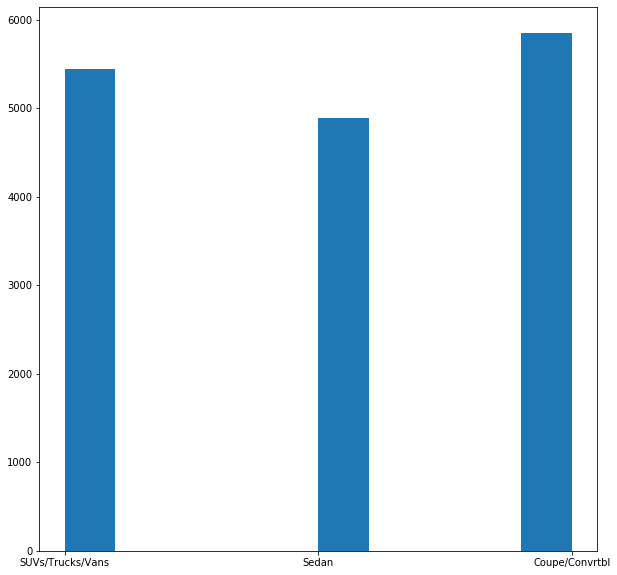

In [16]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.hist(annots["Label1"])

(array([2855.,    0., 4890.,    0.,    0., 5850.,    0., 1514.,    0.,
        1076.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

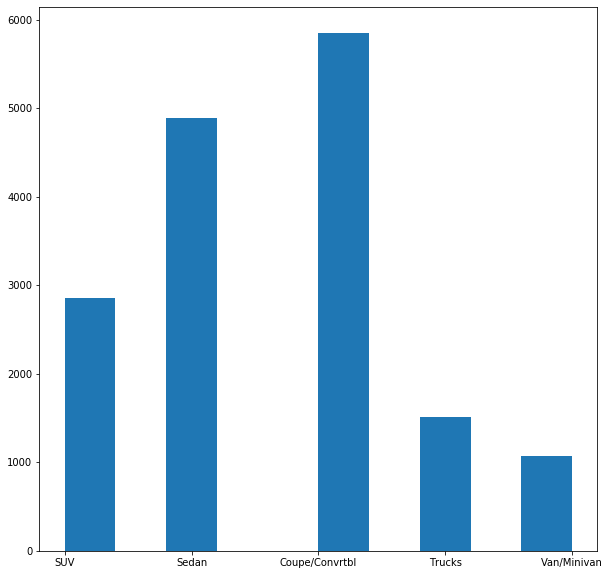

In [17]:
plt.hist(annots["Label2"])

In [18]:
annots.to_csv("devkit/cars_agg_label.csv")